stimulus start: 0.15, stimulus end: 0.5
simulating 426 neurons. Start: Mon Aug  8 15:41:31 2022


INFO       width adjusted from 20. ms to 20.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Mon Aug  8 15:42:18 2022


(<Figure size 720x288 with 3 Axes>,
 <AxesSubplot:title={'center':'Raster Plot'}, ylabel='neuron #'>,
 <AxesSubplot:title={'center':'Population Activity'}, ylabel='A(t) [Hz]'>,
 <AxesSubplot:title={'center':'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

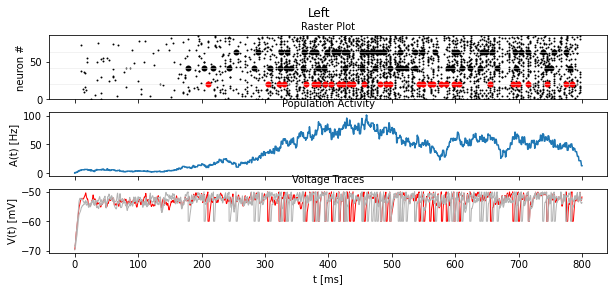

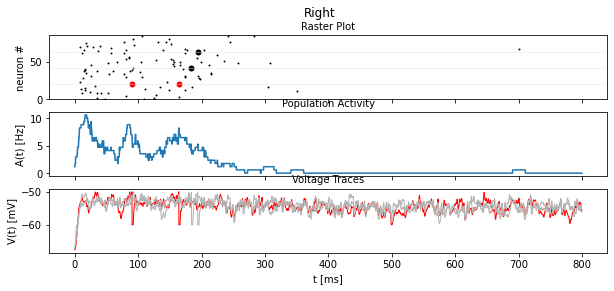

In [4]:
import wang_rmp

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy
import matplotlib.pyplot as plt
from math import floor
import time

b2.defaultclock.dt = 0.10 * b2.ms


stim_start = 150. * b2.ms
stim_duration = 350 * b2.ms
print("stimulus start: {}, stimulus end: {}".format(stim_start, stim_start+stim_duration))
results = wang_rmp.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                        t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                        coherence_level=+0.90, w_pos=2.0, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                        max_sim_time=800. * b2.ms)
plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                    results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                    sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                    results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=20. * b2.ms,
                                    sup_title="Right")


In [5]:
type(results)

dict

In [6]:
rmps_neuron_index = results['idx_monitored_neurons_A']

In [7]:
len(rmps_neuron_index)

85

In [10]:
rmp = results["voltage_monitor_A"]

In [11]:
rmp[[0,1]]

<StateMonitorView, giving access to elements [0, 1] recorded by statemonitor_1>

In [ ]:
results.keys()

dict_keys(['rate_monitor_A', 'spike_monitor_A', 'voltage_monitor_A', 'idx_monitored_neurons_A', 'rate_monitor_B', 'spike_monitor_B', 'voltage_monitor_B', 'idx_monitored_neurons_B', 'rate_monitor_Z', 'spike_monitor_Z', 'voltage_monitor_Z', 'idx_monitored_neurons_Z', 'rate_monitor_inhib', 'spike_monitor_inhib', 'voltage_monitor_inhib', 'idx_monitored_neurons_inhib'])

In [18]:
a=  rmp.v[0]

In [20]:
type(a)

brian2.units.fundamentalunits.Quantity

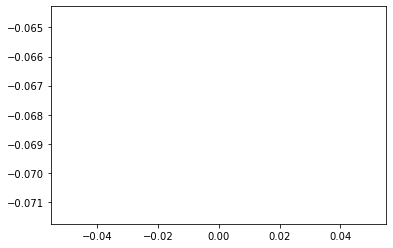

In [21]:
plt.plot(a[0])

In [ ]:
ts = voltage_monitor.t/b2.ms

for i in range(len(voltage_traces_i)):
    color = "r" if i == 0 else ".7"
    raster_plot_index = voltage_traces_i[i]
    population_index = spike_train_idx_list[raster_plot_index]
    ax_voltage.plot(
        ts[idx_voltage], voltage_monitor[population_index].v[idx_voltage]/b2.mV,
        c=color, lw=1.)
    ax_voltage.set_ylabel("V(t) [mV]")
    ax_voltage.set_title("Voltage Traces", fontsize=10)

In [22]:
len(rmp)

8000

In [23]:
ts = rmp.t/b2.ms

In [27]:
trace = rmp.v[0]/b2.mV

In [26]:
rmp.v[0]/b2.mV

array([-68.0134554 , -68.0233633 , -67.94948761, ..., -52.57727461,
       -52.39389076, -52.1908377 ])

In [45]:
%matplotlib inline

In [46]:
%matplotlib widget


In [47]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [48]:
plt.plot(ts, trace)
plt.ylabel("V(t) [mV]")
plt.xlabel("t [ms]")
plt.show()


<IPython.core.display.Javascript object>

In [49]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));

<IPython.core.display.Javascript object>